In [1]:
import os, sys
# Get the current working directory
current_working_directory = os.getcwd()

# Get the parent directory
parent_directory = os.path.dirname(current_working_directory)

# Add the parent directory to sys.path
sys.path.append(parent_directory)

# Now you can import your module
# Example: from data.create_subsites_datasets import create_dataset

In [2]:
import numpy as np
import lymph

In [3]:
lymph

<module 'lymph' from '/Users/juli/Studium/Master/FS23/masterthesis/code/lymph/lymph/__init__.py'>

In [4]:
def f(x, b):
    return -x**2 + b*x + b 

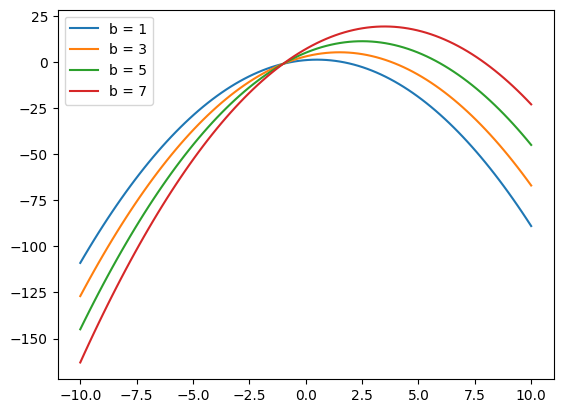

In [5]:
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 100)
b = [1,3,5,7]
for bs in b:
    plt.plot(x, [f(xs, bs) for xs in x], label =f"b = {bs}")
plt.legend()

In [6]:
from scipy.optimize import minimize
res = minimize(lambda x, args: -f(x, *args), x0 = [0.1], args=[3])

print(f"Yields: {res.x}")

Yields: [1.49999998]


In [7]:
## Definitions
from core.util_2 import enhance_data, load_data, create_models


ignore_t = True
NAME = 'test'
if ignore_t:
    convert_t_stage = {0: "all", 1: "all", 2: "all", 3: "all", 4: "all"}
else:
    convert_t_stage = {0: "early", 1: "early", 2: "early", 3: "late", 4: "late"}

t_stages = list(set(convert_t_stage.values()))

datasets_names = [f"synth/synth_s1_s2_n0.csv"]

# Select which locations you want to analize
location_to_include = ["S1", "S2", "S3"]
# Icd codes in locations which you want to exlude
icds_to_neglect = []

dataset = load_data(datasets_names)
dataset = enhance_data(dataset, convert_t_stage)


loc_to_mask = {
        loc: dataset["tumor"]["1"]["location"] == loc for loc in location_to_include
    }

graph = {
        ("tumor", "primary"): ["I", "II", "III"],
        ("lnl", "I"): [],
        ("lnl", "II"): [],
        ("lnl", "III"): [],
    }

lnls_full = graph["tumor", "primary"]

Succesfully loaded 600 Patients


In [8]:
import logging
from IPython.display import display, HTML
logging.basicConfig(level=logging.INFO, format='%(levelname)s - %(message)s')


## Test it with the LymphMixtureModel class

In [9]:
n_clusters = 2
n_subpopulations = len(loc_to_mask)

# subpopulation data 
subpopulation_data = [dataset[v] for v in loc_to_mask.values()]
subpopulation_labels = [l for l in loc_to_mask.keys()]

# The model which we want to use

lymph_model_for_mixture = create_models(1, graph, ignore_t_stage=True)

In [10]:
%load_ext autoreload
%autoreload 2
import importlib

import mixture_model
importlib.reload(mixture_model)
from mixture_model import LymphMixtureModel

LMM = LymphMixtureModel(lymph_model_for_mixture, n_clusters=n_clusters, n_subpopulation=n_subpopulations, name = 'newLMMTest')

# Load the data
LMM.load_data(subpopulation_data, subpopulation_labels, mapping=lambda x: convert_t_stage[x])




INFO - Create LymphMixtureModel with 2 cluster components of type <class 'lymph.models.unilateral.Unilateral'> in /Users/juli/Studium/Master/FS23/masterthesis/code/lysubsite/core/newLMMTest
INFO - Assigned S1 to supopulations with 200 patients
INFO - Assigned S2 to supopulations with 200 patients
INFO - Assigned S3 to supopulations with 200 patients


In [11]:
LMM.cluster_assignments = [0.9,0.1,0.9]
LMM.cluster_parameters = [0.9,0.1,0.4, 0.1,0.6,0.7]
LMM.mm_hmm_likelihood()


-1321.4302737078442

In [44]:
cl_a, history = LMM.estimate_cluster_assignments()

KeyError: 'walkers_per_dim'

In [25]:
max([2,3])


3

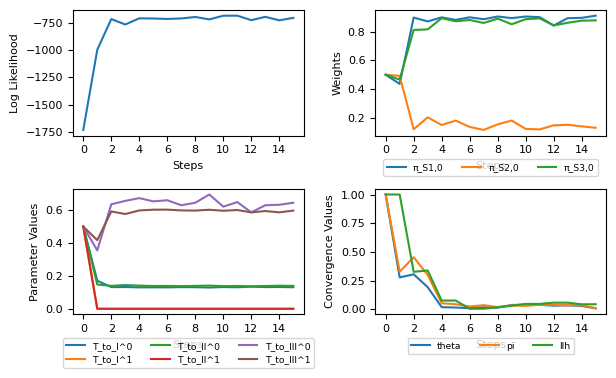

In [35]:
history.plot_history(LMM.subpopulation_labels, list(LMM.lymph_model.get_params(as_dict=True).keys()), LMM.n_clusters, None)

In [13]:
from IPython.display import clear_output
mcmc_config = {
        "sampler": "PRO",
        "sampling_params": {
            "walkers_per_dim": 20,
            "nsteps": 100,
            "nburnin": 400,
        },
    }
global LMM_GLOBAL
LMM_GLOBAL = LMM
LMM.fit(em_config=None, mcmc_config=mcmc_config, do_plot_history=True)

INFO - Run EM algorithm with method DEFAULT.
INFO - Expectation yields: [0.46776112 0.4793685  0.49132418]
INFO - Maximation yields: [1.60490999e-01 7.83056387e-08 1.43637468e-01 6.63676157e-08
 3.92539536e-01 4.51868517e-01]


[[1.60490999e-01 7.83056387e-08 1.43637468e-01 6.63676157e-08
  3.92539536e-01 4.51868517e-01]]
[[0. 0. 0. 0. 0. 0.]]
[-977.06373615]
[]
[]
0.01
True
False


INFO - Expectation yields: [0.88294163 0.1274259  0.85971849]
INFO - Maximation yields: [1.30961912e-01 9.19446087e-08 1.39398389e-01 8.92006061e-08
 6.51854093e-01 5.98700751e-01]


[[1.60490999e-01 7.83056387e-08 1.43637468e-01 6.63676157e-08
  3.92539536e-01 4.51868517e-01]
 [1.30961912e-01 9.19446087e-08 1.39398389e-01 8.92006061e-08
  6.51854093e-01 5.98700751e-01]]
[[0.10131684 0.08011131 0.01497718 0.14677156 0.24829198 0.13976445]
 [0.10131684 0.08011131 0.01497718 0.14677156 0.24829198 0.13976445]]
[-977.06373615 -712.53907426]
[0.37124232]
[False]
0.01
False
False


INFO - Expectation yields: [0.8961619  0.16523232 0.87231627]
INFO - Maximation yields: [1.26097085e-01 1.81228211e-09 1.46611973e-01 1.80619729e-07
 8.60378192e-01 6.10008875e-01]


[[1.60490999e-01 7.83056387e-08 1.43637468e-01 6.63676157e-08
  3.92539536e-01 4.51868517e-01]
 [1.30961912e-01 9.19446087e-08 1.39398389e-01 8.92006061e-08
  6.51854093e-01 5.98700751e-01]
 [1.26097085e-01 1.81228211e-09 1.46611973e-01 1.80619729e-07
  8.60378192e-01 6.10008875e-01]]
[[0.15309065 0.36529968 0.00294328 0.40776329 0.38175345 0.18365447]
 [0.059069   0.60310224 0.02665593 0.20401128 0.02666485 0.08161261]
 [0.09402165 0.96840192 0.02371265 0.61177456 0.3550886  0.10204186]]
[-977.06373615 -712.53907426 -750.38387686]
[0.37124232 0.05043392]
[False False]
0.01
False
False


INFO - Expectation yields: [0.88607397 0.19075473 0.85424676]
INFO - Maximation yields: [1.28380338e-01 2.91119260e-08 1.40613284e-01 4.30141456e-08
 7.11763356e-01 6.09241653e-01]


[[1.30961912e-01 9.19446087e-08 1.39398389e-01 8.92006061e-08
  6.51854093e-01 5.98700751e-01]
 [1.26097085e-01 1.81228211e-09 1.46611973e-01 1.80619729e-07
  8.60378192e-01 6.10008875e-01]
 [1.28380338e-01 2.91119260e-08 1.40613284e-01 4.30141456e-08
  7.11763356e-01 6.09241653e-01]]
[[1.93192548e-02 1.24494573e+00 1.97562370e-02 1.44589760e-01
  1.20698691e-01 1.20184875e-02]
 [1.85452756e-02 9.55750804e-01 3.09693868e-02 7.32095471e-01
  1.60584368e-01 6.64228245e-03]
 [7.73979135e-04 2.89194929e-01 1.12131498e-02 5.87505711e-01
  3.98856777e-02 5.37620509e-03]]
[-712.53907426 -750.38387686 -706.49126569]
[0.05043392 0.06212761]
[False False]
0.01
False
False


INFO - Expectation yields: [0.90614563 0.13571852 0.89813756]
INFO - Maximation yields: [1.34671686e-01 2.60839717e-10 1.39937913e-01 4.24056417e-09
 5.95584805e-01 5.75557145e-01]


[[1.26097085e-01 1.81228211e-09 1.46611973e-01 1.80619729e-07
  8.60378192e-01 6.10008875e-01]
 [1.28380338e-01 2.91119260e-08 1.40613284e-01 4.30141456e-08
  7.11763356e-01 6.09241653e-01]
 [1.34671686e-01 2.60839717e-10 1.39937913e-01 4.24056417e-09
  5.95584805e-01 5.75557145e-01]]
[[0.02790152 0.82565855 0.02966723 1.3778849  0.19071052 0.01962269]
 [0.01029964 1.80056579 0.01246202 0.43371254 0.01496327 0.01834029]
 [0.03820117 0.97490723 0.01720521 0.94417236 0.17574725 0.03796297]]
[-750.38387686 -706.49126569 -734.57922799]
[0.06212761 0.0382368 ]
[False False]
0.01
False
False


INFO - Expectation yields: [0.91365247 0.11973571 0.85752736]
INFO - Maximation yields: [1.33829100e-01 4.25894896e-10 1.39476261e-01 8.02082432e-08
 6.05873727e-01 5.81950482e-01]


[[1.28380338e-01 2.91119260e-08 1.40613284e-01 4.30141456e-08
  7.11763356e-01 6.09241653e-01]
 [1.34671686e-01 2.60839717e-10 1.39937913e-01 4.24056417e-09
  5.95584805e-01 5.75557145e-01]
 [1.33829100e-01 4.25894896e-10 1.39476261e-01 8.02082432e-08
  6.05873727e-01 5.81950482e-01]]
[[2.95809252e-02 1.93086254e+00 4.31494003e-03 1.23917096e-02
  1.16070270e-01 3.45129210e-02]
 [1.79749932e-02 9.73739788e-01 5.08824003e-04 9.00193019e-01
  6.61018328e-02 2.26845112e-02]
 [1.16059320e-02 9.57122748e-01 3.80611603e-03 8.87801309e-01
  4.99684369e-02 1.18284098e-02]]
[-706.49126569 -734.57922799 -757.11684136]
[0.0382368  0.02976768]
[False False]
0.01
False
False


INFO - Expectation yields: [0.90977574 0.16469269 0.88105431]
INFO - Maximation yields: [1.29108907e-01 1.94709725e-04 1.40607132e-01 4.15566429e-08
 6.94652230e-01 6.06838989e-01]


[[1.34671686e-01 2.60839717e-10 1.39937913e-01 4.24056417e-09
  5.95584805e-01 5.75557145e-01]
 [1.33829100e-01 4.25894896e-10 1.39476261e-01 8.02082432e-08
  6.05873727e-01 5.81950482e-01]
 [1.29108907e-01 1.94709725e-04 1.40607132e-01 4.15566429e-08
  6.94652230e-01 6.06838989e-01]]
[[1.61096819e-02 9.99995981e-01 4.94186251e-04 8.99038554e-01
  5.76740291e-02 2.13536159e-02]
 [9.75229121e-03 9.99993438e-01 3.79152657e-03 9.09637473e-01
  4.13950402e-02 1.04827308e-02]
 [2.58619731e-02 1.99998942e+00 4.28571282e-03 1.05989193e-02
  9.90690693e-02 3.18363467e-02]]
[-734.57922799 -757.11684136 -712.03062774]
[0.02976768 0.06332061]
[False False]
0.01
False
False


INFO - Expectation yields: [0.88722104 0.17581345 0.89164725]
INFO - Maximation yields: [1.25416146e-01 1.37181526e-09 1.44797158e-01 1.25032667e-07
 8.50378290e-01 6.14659587e-01]


[[1.33829100e-01 4.25894896e-10 1.39476261e-01 8.02082432e-08
  6.05873727e-01 5.81950482e-01]
 [1.29108907e-01 1.94709725e-04 1.40607132e-01 4.15566429e-08
  6.94652230e-01 6.06838989e-01]
 [1.25416146e-01 1.37181526e-09 1.44797158e-01 1.25032667e-07
  8.50378290e-01 6.14659587e-01]]
[[0.03381745 0.99999344 0.0151849  0.02501169 0.15495021 0.03193748]
 [0.0026456  1.9999723  0.00720004 0.49484941 0.03112531 0.00946404]
 [0.03117185 0.99997886 0.02238493 0.5198611  0.18607552 0.02247344]]
[-757.11684136 -712.03062774 -707.42505069]
[0.06332061 0.00651034]
[False  True]
0.01
False
False


INFO - Expectation yields: [0.87087721 0.17764533 0.87865531]
INFO - Maximation yields: [1.30170066e-01 1.65526631e-09 1.39363442e-01 4.03213119e-08
 6.65960384e-01 6.03236198e-01]


[[1.29108907e-01 1.94709725e-04 1.40607132e-01 4.15566429e-08
  6.94652230e-01 6.06838989e-01]
 [1.25416146e-01 1.37181526e-09 1.44797158e-01 1.25032667e-07
  8.50378290e-01 6.14659587e-01]
 [1.30170066e-01 1.65526631e-09 1.39363442e-01 4.03213119e-08
  6.65960384e-01 6.03236198e-01]]
[[0.00684075 1.99995336 0.00693635 0.39746965 0.05745578 0.00231146]
 [0.02195682 0.99997886 0.02265648 0.81285039 0.15384232 0.01054618]
 [0.01511607 0.9999745  0.01572014 0.41538074 0.09638654 0.00823472]]
[-712.03062774 -707.42505069 -722.17417116]
[0.00651034 0.02042322]
[ True False]
0.01
False
False


INFO - Expectation yields: [0.87036903 0.16216654 0.83888437]
INFO - Maximation yields: [1.32326832e-01 1.89534309e-10 1.39754792e-01 8.60736122e-09
 6.30619284e-01 5.89791371e-01]


[[1.25416146e-01 1.37181526e-09 1.44797158e-01 1.25032667e-07
  8.50378290e-01 6.14659587e-01]
 [1.30170066e-01 1.65526631e-09 1.39363442e-01 4.03213119e-08
  6.65960384e-01 6.03236198e-01]
 [1.32326832e-01 1.89534309e-10 1.39754792e-01 8.60736122e-09
  6.30619284e-01 5.89791371e-01]]
[[3.00701594e-02 2.79433397e-01 2.47126743e-02 1.15621471e+00
  1.88255625e-01 2.00762645e-02]
 [6.69519504e-03 5.43796063e-01 1.37411049e-02 3.04650474e-01
  6.94362955e-02 1.11824533e-03]
 [2.33749644e-02 8.23229460e-01 1.09715694e-02 8.51564241e-01
  1.18819329e-01 2.11945098e-02]]
[-707.42505069 -722.17417116 -720.07259163]
[0.02042322 0.00291857]
[False  True]
0.01
False
False


INFO - Expectation yields: [0.89663095 0.15223502 0.87880298]
INFO - Maximation yields: [1.29612362e-01 1.47774079e-09 1.39682418e-01 2.56385923e-07
 6.78784109e-01 6.05350504e-01]


[[1.30170066e-01 1.65526631e-09 1.39363442e-01 4.03213119e-08
  6.65960384e-01 6.03236198e-01]
 [1.32326832e-01 1.89534309e-10 1.39754792e-01 8.60736122e-09
  6.30619284e-01 5.89791371e-01]
 [1.29612362e-01 1.47774079e-09 1.39682418e-01 2.56385923e-07
  6.78784109e-01 6.05350504e-01]]
[[4.07810579e-03 4.94578494e-01 1.69609581e-03 6.03805592e-01
  1.13991022e-02 6.30041075e-03]
 [1.24231625e-02 8.28865060e-01 1.10726353e-03 9.15424667e-01
  4.22736941e-02 1.61278436e-02]
 [8.34505672e-03 3.34286566e-01 5.88832282e-04 1.51923026e+00
  3.08745919e-02 9.82743287e-03]]
[-722.17417116 -720.07259163 -694.21189736]
[0.00291857 0.03725187]
[ True False]
0.01
False
False


INFO - Expectation yields: [0.88472343 0.1581898  0.83455635]
INFO - Maximation yields: [1.29974197e-01 1.52355758e-09 1.42684297e-01 1.15478686e-09
 6.93762269e-01 5.95022747e-01]


[[1.32326832e-01 1.89534309e-10 1.39754792e-01 8.60736122e-09
  6.30619284e-01 5.89791371e-01]
 [1.29612362e-01 1.47774079e-09 1.39682418e-01 2.56385923e-07
  6.78784109e-01 6.05350504e-01]
 [1.29974197e-01 1.52355758e-09 1.42684297e-01 1.15478686e-09
  6.93762269e-01 5.95022747e-01]]
[[0.01292915 0.82180108 0.00676851 0.90297851 0.05556595 0.01161374]
 [0.00784945 0.38936222 0.00728286 1.88996184 0.01656711 0.01446062]
 [0.00507969 0.43243887 0.01405137 0.98698333 0.03899884 0.00284688]]
[-720.07259163 -694.21189736 -738.76459043]
[0.03725187 0.06030702]
[False False]
0.01
False
False


INFO - Expectation yields: [0.8705435  0.10553754 0.85704868]
INFO - Maximation yields: [1.32971947e-01 2.56650499e-10 1.37884386e-01 3.69492347e-08
 6.11153205e-01 5.92022796e-01]


[[1.29612362e-01 1.47774079e-09 1.39682418e-01 2.56385923e-07
  6.78784109e-01 6.05350504e-01]
 [1.29974197e-01 1.52355758e-09 1.42684297e-01 1.15478686e-09
  6.93762269e-01 5.95022747e-01]
 [1.32971947e-01 2.56650499e-10 1.37884386e-01 3.69492347e-08
  6.11153205e-01 5.92022796e-01]]
[[0.00947991 0.36074031 0.00286459 1.61183033 0.0265427  0.01319768]
 [0.0067147  0.40292955 0.01856459 0.98823606 0.04919456 0.00408827]
 [0.01619462 0.76366986 0.0157     0.62359426 0.07573726 0.0091094 ]]
[-694.21189736 -738.76459043 -694.52937245]
[0.06030702 0.06369092]
[False False]
0.01
False
False


INFO - Expectation yields: [0.84368478 0.15129643 0.85077086]
INFO - Maximation yields: [1.29178156e-01 1.77505949e-04 1.41540295e-01 5.87143403e-08
 7.00734146e-01 6.03810653e-01]


[[1.29974197e-01 1.52355758e-09 1.42684297e-01 1.15478686e-09
  6.93762269e-01 5.95022747e-01]
 [1.32971947e-01 2.56650499e-10 1.37884386e-01 3.69492347e-08
  6.11153205e-01 5.92022796e-01]
 [1.29178156e-01 1.77505949e-04 1.41540295e-01 5.87143403e-08
  7.00734146e-01 6.03810653e-01]]
[[0.00561482 0.99997425 0.01408147 0.96421794 0.03771206 0.00323195]
 [0.01731987 0.99999566 0.02003231 0.14490373 0.08585248 0.0082574 ]
 [0.01170504 1.99996991 0.00595085 0.8193142  0.04814042 0.01148934]]
[-738.76459043 -694.52937245 -724.95394455]
[0.06369092 0.04196759]
[False False]
0.01
False
False


INFO - Expectation yields: [0.89908255 0.12708453 0.88242587]
INFO - Maximation yields: [1.32987398e-01 1.63337118e-08 1.37966664e-01 2.60280562e-08
 6.11439774e-01 5.91682938e-01]
WARNING - Max steps reached without convergence, return current approximation.
INFO - MCMC sampling chain found in /Users/juli/Studium/Master/FS23/masterthesis/code/lysubsite/core/newLMMTest/samples/mcmc_sampling_chain_100_400.npy. Skipping Sampling.


[[1.32971947e-01 2.56650499e-10 1.37884386e-01 3.69492347e-08
  6.11153205e-01 5.92022796e-01]
 [1.29178156e-01 1.77505949e-04 1.41540295e-01 5.87143403e-08
  7.00734146e-01 6.03810653e-01]
 [1.32987398e-01 1.63337118e-08 1.37966664e-01 2.60280562e-08
  6.11439774e-01 5.91682938e-01]]
[[0.00956209 0.99999566 0.00895607 0.08910988 0.04672503 0.00640442]
 [0.01924149 1.99971964 0.01732077 0.44745386 0.09300306 0.01337922]
 [0.0096794  0.99972397 0.0083647  0.35834397 0.04627804 0.0069748 ]]
[-694.52937245 -724.95394455 -699.94017796]
[0.04196759 0.03573701]
[False False]
0.01
False
False


['T_to_I', 'T_to_II', 'T_to_III']


INFO - Saved matplotlib figure
/Users/juli/Studium/Master/FS23/masterthesis/code/lysubsite/core/mm_plotting.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
INFO - Saved matplotlib figure
/Users/juli/Studium/Master/FS23/masterthesis/code/lysubsite/core/mm_plotting.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


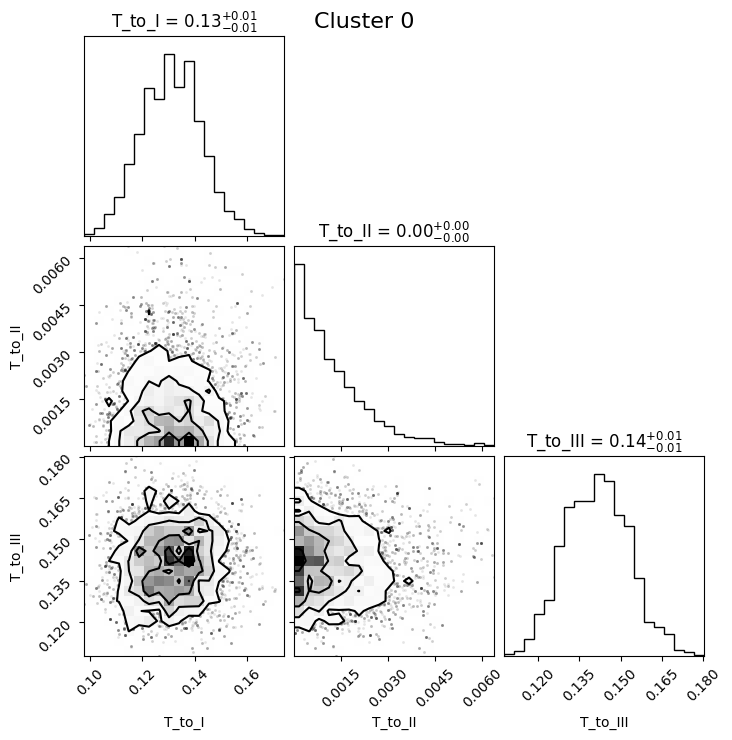

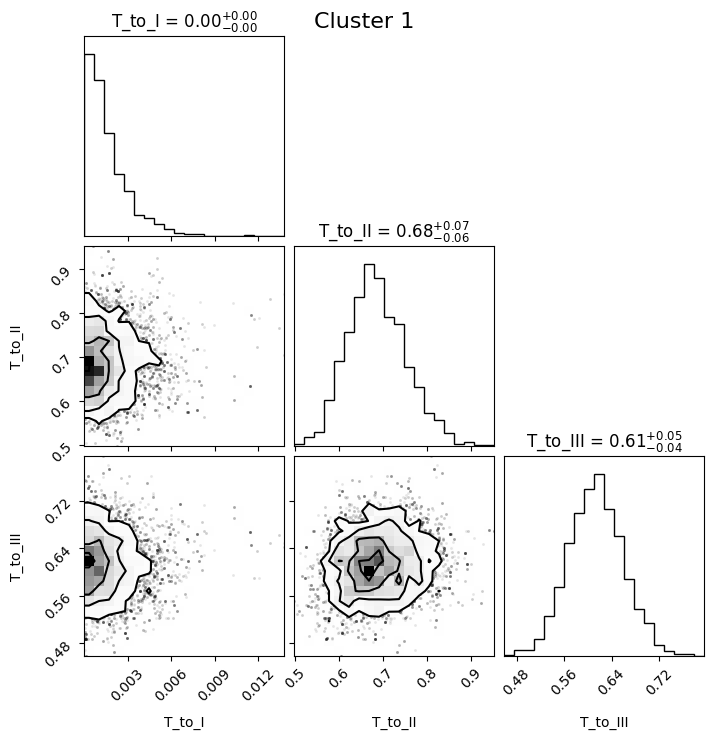

In [20]:
LMM.plot_cluster_parameters()

INFO - Saved matplotlib figure
/Users/juli/Studium/Master/FS23/masterthesis/code/lysubsite/core/mm_plotting.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


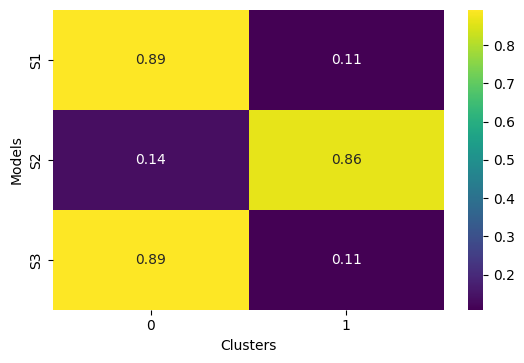

In [13]:
LMM.plot_cluster_assignment_matrix(labels=list(loc_to_mask.keys()))

In [38]:
LMM.cluster_parameters

array([0.13106746, 0.00122072, 0.1413168 , 0.0016444 , 0.68678527,
       0.61340314])

In [18]:
a = np.random.random(size = (3,5))

In [19]:
a.max(axis = 0)

array([0.74276604, 0.86868332, 0.90628962, 0.91425815, 0.78697189])

In [84]:
b = np.abs(np.diff(a) / a[:, 1:])
np.all(b < 15)

True

In [80]:
a.mean(axis = 0)

array([0.10597576, 0.32946563, 0.24513284, 0.82566208, 0.35322496])

In [69]:
b.max()

0.963535476477235

In [ ]:
from IPython.display import clear_output
mcmc_config = {
        "sampler": "PRO",
        "sampling_params": {
            "walkers_per_dim": 20,
            "nsteps": 100,
            "nburnin": 400,
        },
    }

em_config_partially = {
                "max_steps": 25,
                "method": "DEFAULT",
                "e_step": {
                    "walkers_per_dim": 20,
                    "nsteps": 50,
                    "nburnin": 20,
                    "sampler": "SIMPLE",
                    "show_progress": True,
                },
                "m_step": {
                    "minimize_method": "SLSQP",
                    "imputation_function": lambda x: int(10 / (5) * x + 1),
                },
                "convergence": {
                    "criterion": "default",
                    "default": {"lookback_period": 3, "threshold": 0.010},
                },
            }
        


history = LMM.fit(em_config=em_config_partially, mcmc_config=mcmc_config, force_resampling = False)






In [32]:
np.all([False, False])

False

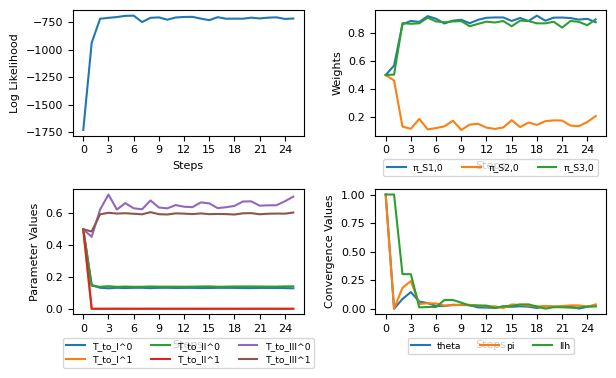

In [27]:
history.plot_history(LMM.subpopulation_labels, list(LMM.lymph_model.get_params(as_dict=True).keys()), LMM.n_clusters, None)

In [28]:
history.convergence_value

[[1, 1, 1],
 [0.0, 0.0, 1],
 [0.08571975652371128, 0.1830645157727271, 0.3030070272175607],
 [0.145879901490449, 0.24270599759186573, 0.3030070272175607],
 [0.06314017679267858, 0.041774287618106504, 0.011987507412237657],
 [0.049602348989226885, 0.048305995321042905, 0.01582300918743723],
 [0.024340269018107263, 0.04660377366297419, 0.01582300918743723],
 [0.023774903868064357, 0.028688005094948954, 0.0770581601921438],
 [0.03490724219667485, 0.031035095221422365, 0.0770581601921438],
 [0.0332587464694476, 0.035472871703087716, 0.05374535354053744],
 [0.03130507927727855, 0.03471575518446103, 0.028634115239600133],
 [0.011923171762159956, 0.027240991681765317, 0.028634115239600133],
 [0.010297847888011136, 0.021088854462806172, 0.027937486755421306],
 [0.0077066478340865885, 0.02123515605002732, 0.0067584543660474915],
 [0.019007204524811416, 0.006429777892116004, 0.022371904447640353],
 [0.017719847856024873, 0.03795624925533084, 0.022371904447640353],
 [0.021991894285063096, 0.03371

In [29]:
from IPython.display import clear_output
mcmc_config = {
        "sampler": "PRO",
        "sampling_params": {
            "walkers_per_dim": 20,
            "nsteps": 100,
            "nburnin": 400,
        },
    }

em_config_partially = {
                "max_steps": 25,
                "method": "INVERTED",
                "e_step": {
                    "walkers_per_dim": 20,
                    "nsteps": 50,
                    "nburnin": 20,
                    "sampler": "SIMPLE",
                    "show_progress": True,
                },
                "m_step": {
                    "minimize_method": "SLSQP",
                    "imputation_function": lambda x: int(10 / (5) * x + 1),
                },
                "convergence": {
                    "criterion": "default",
                    "default": {"lookback_period": 3, "threshold": 0.010},
                },
            }
        


history = LMM.fit(em_config=em_config_partially, mcmc_config=mcmc_config, force_resampling = False)






INFO - Run EM algorithm with method INVERTED.
INFO - Step 0: Perform expectation.
INFO - Expectation yields: [0.28450779 0.29194679 0.43201664 0.22991399 0.3544517  0.4868598 ]
INFO - Step 0: Perform maximation.
INFO - Maximation yields: [9.99983494e-01 2.22238628e-05 9.99990454e-01]
INFO - Step 1: Perform expectation.


False


INFO - Expectation yields: [0.3110284  0.10932938 0.35627602 0.18016653 0.45540258 0.59746888]
INFO - Step 1: Perform maximation.
INFO - Maximation yields: [1.00000000e+00 2.80326818e-11 9.84191401e-01]
INFO - Step 2: Perform expectation.


False


INFO - Expectation yields: [0.30746012 0.11172064 0.32721648 0.1680136  0.53620203 0.70259594]
INFO - Step 2: Perform maximation.
INFO - Maximation yields: [9.99983622e-01 5.99480406e-05 9.99976462e-01]
INFO - Step 3: Perform expectation.


False


INFO - Expectation yields: [0.2642976  0.11114715 0.31941971 0.1540564  0.50845713 0.51204119]
INFO - Step 3: Perform maximation.
INFO - Maximation yields: [1.00000000e+00 2.82917617e-05 1.00000000e+00]
INFO - Step 4: Perform expectation.


False


INFO - Expectation yields: [0.28174332 0.08547449 0.2591013  0.15777879 0.58110386 0.59022805]
INFO - Step 4: Perform maximation.
INFO - Maximation yields: [9.99999996e-01 4.57818943e-09 9.99999995e-01]
INFO - Step 5: Perform expectation.


False


INFO - Expectation yields: [0.43698261 0.11884116 0.37870597 0.1562545  0.65447282 0.64995833]
INFO - Step 5: Perform maximation.
INFO - Maximation yields: [9.99999718e-01 1.14515441e-07 9.99999943e-01]
INFO - Step 6: Perform expectation.


False


INFO - Expectation yields: [0.31107994 0.10842914 0.3169175  0.18293742 0.48449109 0.53753648]
INFO - Step 6: Perform maximation.
INFO - Maximation yields: [1.00000000e+00 2.23590781e-05 9.99995952e-01]
INFO - Step 7: Perform expectation.


False


INFO - Expectation yields: [0.31282505 0.13381728 0.26825972 0.17436864 0.59397836 0.57174915]
INFO - Step 7: Perform maximation.
INFO - Maximation yields: [9.99984056e-01 4.59097477e-06 9.99990692e-01]
INFO - Step 8: Perform expectation.


False


INFO - Expectation yields: [0.27304299 0.10455674 0.29630779 0.1410936  0.65109556 0.55738797]
INFO - Step 8: Perform maximation.
INFO - Maximation yields: [1.0000000e+00 2.6437207e-05 1.0000000e+00]
INFO - Step 9: Perform expectation.


False


INFO - Expectation yields: [0.30917192 0.0913038  0.30682849 0.16110441 0.56775248 0.57177744]
INFO - Step 9: Perform maximation.
INFO - Maximation yields: [9.99999994e-01 7.79170088e-09 9.99999993e-01]
INFO - Step 10: Perform expectation.


False


INFO - Expectation yields: [0.34395054 0.10040968 0.30642064 0.12246729 0.52467476 0.59629064]
INFO - Step 10: Perform maximation.
INFO - Maximation yields: [1.00000000e+00 3.23945148e-10 1.00000000e+00]
INFO - Step 11: Perform expectation.


False


INFO - Expectation yields: [0.29843766 0.12713561 0.29416682 0.19422178 0.63758287 0.50346474]
INFO - Step 11: Perform maximation.
INFO - Maximation yields: [9.99999999e-01 3.35772743e-10 9.99999999e-01]
INFO - Step 12: Perform expectation.


False


INFO - Expectation yields: [0.2659791  0.10512554 0.2895941  0.21291661 0.5465545  0.674851  ]
INFO - Step 12: Perform maximation.
INFO - Maximation yields: [9.99999993e-01 6.42934127e-09 9.99999994e-01]
INFO - Step 13: Perform expectation.


False


INFO - Expectation yields: [0.31826005 0.11315781 0.27514917 0.15172926 0.595099   0.64542359]
INFO - Step 13: Perform maximation.
INFO - Maximation yields: [9.99955184e-01 5.83078177e-11 1.00000000e+00]
INFO - Step 14: Perform expectation.


False


INFO - Expectation yields: [0.3108463  0.12089066 0.27023988 0.22044653 0.60009893 0.58206846]
INFO - Step 14: Perform maximation.
INFO - Maximation yields: [9.99999999e-01 1.77547218e-12 1.00000000e+00]
INFO - Step 15: Perform expectation.


False


INFO - Expectation yields: [0.27419056 0.10910999 0.30402078 0.1302607  0.56995476 0.66804015]
INFO - Step 15: Perform maximation.
INFO - Maximation yields: [9.99999841e-01 1.38052262e-06 9.99999863e-01]
INFO - Step 16: Perform expectation.


False


INFO - Expectation yields: [0.3394274  0.1125732  0.29316049 0.18546204 0.64352094 0.54064538]
INFO - Step 16: Perform maximation.
INFO - Maximation yields: [9.99984835e-01 1.24157619e-05 9.99985410e-01]
INFO - Step 17: Perform expectation.


False


INFO - Expectation yields: [0.278585   0.10903345 0.28006316 0.1101099  0.63263481 0.67347913]
INFO - Step 17: Perform maximation.
INFO - Maximation yields: [9.99988373e-01 4.25700178e-07 1.00000000e+00]
INFO - Step 18: Perform expectation.


False


INFO - Expectation yields: [0.29930482 0.10929008 0.31440499 0.20032657 0.52647152 0.49987933]
INFO - Step 18: Perform maximation.
INFO - Maximation yields: [9.99999995e-01 2.11442508e-09 9.99999998e-01]
INFO - Step 19: Perform expectation.


False


INFO - Expectation yields: [0.37223001 0.11680601 0.3455137  0.21001341 0.63694081 0.62198831]
INFO - Step 19: Perform maximation.
INFO - Maximation yields: [9.99999925e-01 1.75856803e-08 9.99999982e-01]
INFO - Step 20: Perform expectation.


False


INFO - Expectation yields: [0.31588156 0.10331257 0.3525736  0.11955722 0.55110555 0.67131825]
INFO - Step 20: Perform maximation.
INFO - Maximation yields: [1.00000000e+00 6.87053689e-11 1.00000000e+00]
INFO - Step 21: Perform expectation.


False


INFO - Expectation yields: [0.32094292 0.11951582 0.28915134 0.14249048 0.57687373 0.61455976]
INFO - Step 21: Perform maximation.
INFO - Maximation yields: [9.99999992e-01 3.92893876e-09 9.99999998e-01]
INFO - Step 22: Perform expectation.


False


INFO - Expectation yields: [0.36136655 0.107274   0.30781767 0.12619517 0.56309741 0.58923782]
INFO - Step 22: Perform maximation.
INFO - Maximation yields: [9.99999974e-01 7.92686317e-09 9.99999991e-01]
INFO - Step 23: Perform expectation.


False


INFO - Expectation yields: [0.28513968 0.10748669 0.34421821 0.15936328 0.53984187 0.62221724]
INFO - Step 23: Perform maximation.
INFO - Maximation yields: [9.99999998e-01 1.09020359e-09 9.99999995e-01]
INFO - Step 24: Perform expectation.


False


INFO - Expectation yields: [0.32555132 0.11539229 0.2834549  0.14869973 0.54497903 0.53616314]
INFO - Step 24: Perform maximation.
INFO - Maximation yields: [9.99990955e-01 1.54257561e-05 9.99999004e-01]
WARNING - Max steps reached without convergence, return current approximation.
INFO - MCMC sampling chain found in /Users/juli/Studium/Master/FS23/masterthesis/code/lysubsite/core/newLMMTest/samples/mcmc_sampling_chain_100_400.npy. Skipping Sampling.


False


In [30]:
history.convergence_value

[[1, 1, 1],
 [0.0, 0.0, 1],
 [0.0913087033768537, 0.007899526183093752, 0.07303848229144502],
 [0.12094785089845872, 0.010528037725497263, 0.27882082580341877],
 [0.0985605995630594, 0.010531219871929842, 0.27882082580341877],
 [0.10097420878857566, 3.053324709242042e-05, 0.0355751536620509],
 [0.10930809757271359, 1.8821476612206273e-05, 0.13058229483761624],
 [0.0937139839463157, 1.4866354211932578e-05, 0.13058229483761624],
 [0.09315632934576329, 1.3337555350526826e-05, 0.09141984656783694],
 [0.09203057654226537, 1.32047785148804e-05, 0.033852652636542975],
 [0.046820092484247344, 1.609188248109145e-05, 0.08306330465840656],
 [0.06992129362913413, 1.7622099423923208e-05, 0.08306330465840656],
 [0.06091283534940395, 4.974561292620843e-09, 0.09403114305587898],
 [0.08807071983492287, 4.26197011016427e-09, 0.09403114305587898],
 [0.10444837032635146, 2.9874829773901546e-05, 0.08074854566169545],
 [0.05204588827695256, 2.9874940490004498e-05, 0.08348439306365864],
 [0.0529677021237914,

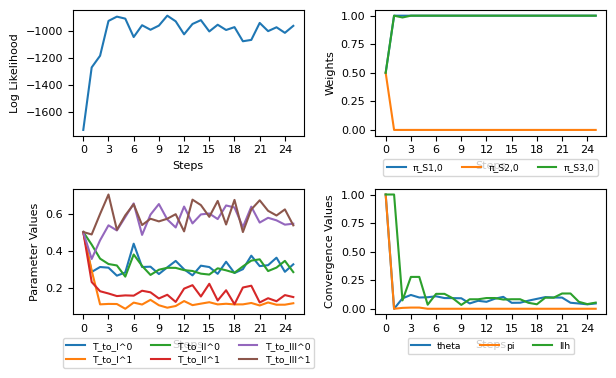

In [31]:
history.plot_history(LMM.subpopulation_labels, list(LMM.lymph_model.get_params(as_dict=True).keys()), LMM.n_clusters, None)